<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Dataquest/Dataquest_Guided_Project_Storytelling_Data_Visualization_on_Exchange_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Storytelling e Visualização de Dados de Taxa de Câmbio

O objetivo deste notebook é avaliar a evolução da taxa de câmbio diária do Euro sobre o Real entre 1999 e 2021, os dados são atualizados constantemente no [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020).

E então construir uma narrativa a partir dos dados observados além de criar um gráfico para "Visualização de Dados Explanatória", quando o objetivo não é gerar gráficos para explorar, e sim para explicar algo ao seu público-alvo usando princípios do Gestalt.
Em outras palavras, a ideia é criar um gráfico limpo, focando na mensagem que se deseja transmitir ao público, sem excessos, um gráfico mais trabalhado que represente um resultado final da análise, uma apresentação do tema das descobertas ao público.

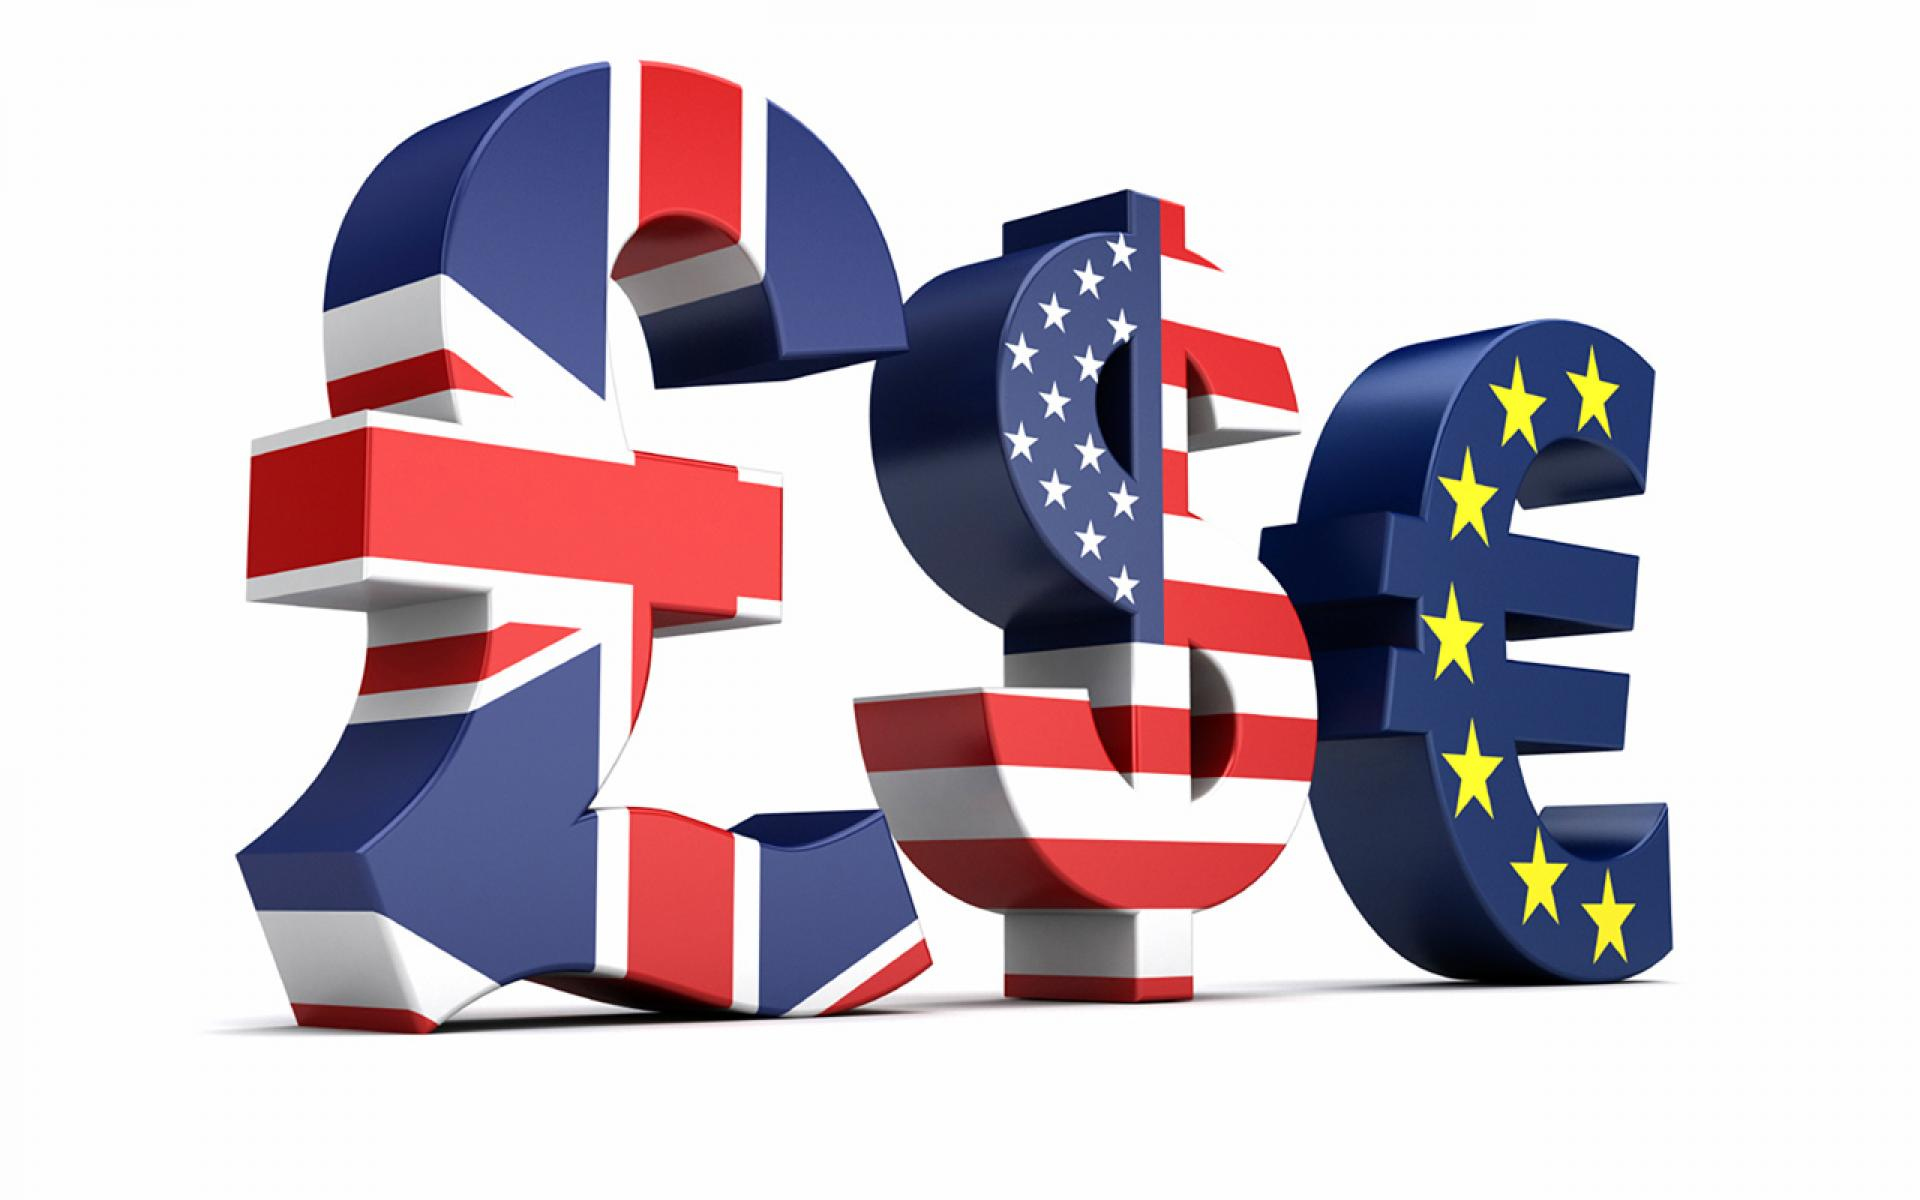

##Investigando o dataset e definindo a história

Ao importar o arquivo e dar a primeira olhada vemos que temos muito mais dados do que precisamos analisar, e temos alguns tratamentos a fazer antes de usar os dados.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/euro-daily-hist_1999_2020.csv')
df.sample(10)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5258,2001-01-03,1.6915,1.9558,1.8545,1.4266,1.5220,7.8880,0.57498,35.375,7.4595,15.6466,0.63250,NaN,7.4333,7.5750,264.55,9099.72,3.8987,44.5290,79.92,108.88,1211.17,3.81300,0.5843,0.4110,9.3465,3.6209,8.3145,2.1272,48.643,3.9030,2.4730,27.2182,8.9467,1.6505,213.5525,43.988,41.4824,0.6330,0.9530,7.1313
1051,2017-03-22,1.4086,1.9558,3.3484,1.4458,1.0714,7.4433,NaN,27.021,7.4372,NaN,0.86790,NaN,8.3949,7.4088,309.16,14404.65,3.9501,70.6995,NaN,120.07,1210.08,NaN,NaN,NaN,20.6900,4.7848,9.1463,1.5353,54.272,4.2816,4.5590,62.6509,9.5105,1.5108,NaN,NaN,37.4250,3.9156,1.0807,13.6114
561,2019-02-22,1.5923,1.9558,4.2392,1.4976,1.1346,7.6109,NaN,25.667,7.4620,NaN,0.87263,NaN,8.8884,7.4230,318.03,15920.00,4.0973,80.5530,135.70,125.56,1273.20,NaN,NaN,NaN,21.7810,4.6174,9.7643,1.6639,59.052,4.3370,4.7611,74.1694,10.5998,1.5324,NaN,NaN,35.4930,6.0378,1.1325,15.8607
4210,2005-01-10,1.7256,1.9559,3.5383,1.6041,1.5469,10.8454,0.58090,30.245,7.4403,15.6466,0.69780,NaN,10.2144,7.5650,247.80,12173.20,5.7186,57.3960,82.99,136.83,1380.66,3.45280,0.6969,0.4321,14.7734,4.9767,8.2270,1.8865,73.544,4.0763,3.8671,36.3559,9.0430,2.1573,239.7800,38.528,51.2530,1.8155,1.3103,7.8438
4583,2003-08-06,1.7572,1.9465,3.4689,1.5942,1.5344,9.4292,0.58679,32.156,7.4348,15.6466,0.70500,NaN,8.8850,7.5796,261.95,9797.72,5.0501,52.5360,88.21,136.95,1349.55,3.45270,0.6502,0.4280,12.2544,4.3305,8.1820,1.9646,62.422,4.3819,3.7390,34.5271,9.1997,2.0089,234.8400,41.810,47.9544,1.6030,1.1392,8.4019
2160,2012-11-19,1.2283,1.9558,2.6494,1.2744,1.2045,7.9569,NaN,25.418,7.4584,NaN,0.80320,NaN,9.8930,7.5415,283.42,12288.36,5.0310,70.2740,NaN,103.60,1386.91,3.45280,0.6961,NaN,16.7125,3.9101,7.3715,1.5621,52.489,4.1458,4.5363,40.3100,8.6419,1.5632,NaN,NaN,39.2050,2.3007,1.2762,11.2874
1334,2016-02-16,1.5605,1.9558,4.4833,1.5430,1.1018,7.2741,NaN,27.029,7.4644,NaN,0.77580,NaN,8.6950,7.6170,310.75,14997.87,4.3662,76.3985,NaN,127.02,1358.70,NaN,NaN,NaN,21.0457,4.6685,9.6049,1.6931,53.050,4.4062,4.4613,86.4489,9.4742,1.5656,NaN,NaN,39.7900,3.3023,1.1166,17.5669
4812,2002-09-19,1.7778,1.9462,3.2906,1.5416,1.4678,8.1230,0.57333,30.100,7.4290,15.6466,0.63140,NaN,7.6545,7.3230,242.95,8829.16,4.7029,47.4320,86.40,118.85,1181.90,3.45250,0.5919,0.4129,9.8461,3.7248,7.3245,2.0640,51.260,4.0552,3.2593,31.0381,9.0955,1.7365,228.1936,43.212,42.1388,1.6370,0.9814,10.3489
3646,2007-03-09,1.6889,1.9558,2.7683,1.5469,1.6137,10.1879,0.57940,28.168,7.4488,15.6466,0.68060,NaN,10.2799,7.3570,251.08,12071.03,5.5212,58.0270,88.84,154.28,1244.13,3.45280,0.7079,0.4293,14.6872,4.6095,8.1120,1.9085,63.762,3.8828,3.3799,34.4560,9.2933,2.0071,NaN,34.058,42.9690,1.8703,1.3155,9.7263
2199,2012-09-25,1.2393,1.9558,2.6192,1.2677,1.2092,8.1566,NaN,24.921,7.4565,NaN,0.79650,NaN,10.0266,7.4475,283.33,12386.15,5.0566,68.9470,NaN,100.57,1447.36,3.45280,0.6962,NaN,16.6079,3.9714,7.4000,1.5684,54.000,4.1380,4.5105,40.1090,8.4725,1.5860,NaN,NaN,39.9990,2.3194,1.2932,10.5973


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

* Aqui vamos renomear as colunas para uma nomenclatura melhor de trabalhar
* Vamos converter a informação de data do tipo objeto para formato de data e ter acesso a mais funcionalidades
* Vamos ordenar por data para criar nosso gráfico ao longo do tempo

In [ ]:
df.rename(columns={'[Brazilian real ]': 'BR_real',
                   'Period\\Unit:': 'Time'},
                   inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)
df.reset_index(drop=True, inplace=True)

Como Temos mais dados do que necessitamos para analisar, vamos isolar as duas colunas de interesse.

In [ ]:
euro_to_real = df[['Time','BR_real']]
euro_to_real

,Time,BR_real
0,1999-01-04,NaN
1,1999-01-05,NaN
2,1999-01-06,NaN
3,1999-01-07,NaN
4,1999-01-08,NaN
...,...,...
5776,2021-04-30,6.4597
5777,2021-05-03,6.5507
5778,2021-05-04,6.5785
5779,2021-05-05,6.5174


Outro ponto interessante, é que com o método ```info``` notamos que a coluna real é do tipo object e não float, utilizando o método ```value_counts``` notamos que há registros com um traço ao invés de um valor numérico. Muito provavelmente indica que nesse dia não houve variação na taxa de câmbio, então como nosso objetivo é analisar a variação podemos descartar esses resultados e converter a coluna para float.

In [ ]:
euro_to_real['BR_real'].value_counts()

-         61
3.3277     4
2.7570     4
3.3232     4
3.0909     4
          ..
2.2910     1
3.9875     1
3.3408     1
3.6370     1
3.7676     1
Name: BR_real, Length: 4932, dtype: int64

In [ ]:
euro_to_real[euro_to_real['BR_real'] == '-']

,Time,BR_real
339,2000-04-21,-
340,2000-04-24,-
345,2000-05-01,-
515,2000-12-25,-
516,2000-12-26,-
...,...,...
3210,2011-04-25,-
3385,2011-12-26,-
3459,2012-04-06,-
3460,2012-04-09,-


In [ ]:
euro_to_real = euro_to_real.drop(euro_to_real[euro_to_real['BR_real'] == '-'].index,axis=0)

In [ ]:
euro_to_real['BR_real'].value_counts()

3.0909    4
2.7570    4
3.3277    4
3.2395    4
3.3232    4
         ..
3.3408    1
3.6370    1
4.5834    1
2.1601    1
3.7676    1
Name: BR_real, Length: 4931, dtype: int64

In [ ]:
euro_to_real['BR_real'] = euro_to_real['BR_real'].astype('float64') 

Agora temos um DataFrame pronto para uso.
Vamos gerar um gráfico simples para observar o resultado.

In [ ]:
euro_to_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 0 to 5780
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     5720 non-null   datetime64[ns]
 1   BR_real  5452 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.1 KB


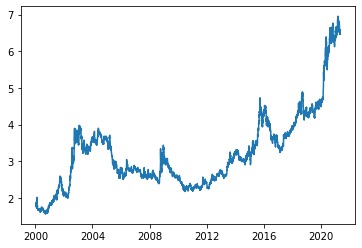

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_real['Time'],
         euro_to_real['BR_real'])
plt.show()

Já podemos ver variações e alguns picos, no entanto como estamos observando variações diárias ao longo de muitos anos, o gráfico fica "rabiscado", e nosso foco não é analisar o dado no detalhe. Uma forma de amenizar essas variações diárias para focar nas grande mudanças ao longo do tempo é utilizar o conceito "rolling mean".

O ```rolling``` é um método que calcula a média de um período e "substitui" os valores originais pela média, parece não fazer sentido não utilizar a informação original, mas ao visualizar um gráfico percebemos como se torna mais agradável de observar.

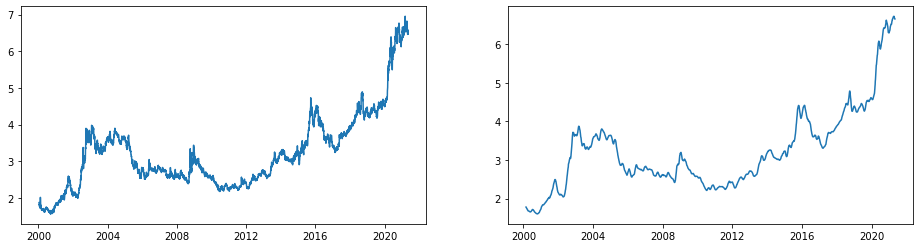

In [ ]:
#gerando variação média mensal do real e gravando em uma nova coluna
rolling_real = euro_to_real['BR_real'].rolling(30).mean()
euro_to_real['rolling_real'] = rolling_real

#definindo tamanho
plt.figure(figsize=(16,4))

#gráfico 1 (antes)
plt.subplot(1,2,1)
plt.plot(euro_to_real['Time'],
         euro_to_real['BR_real'])

#gráfico 2 (depois utilizando rolling)
plt.subplot(1,2,2)
plt.plot(euro_to_real['Time'],
         euro_to_real['rolling_real'])

plt.show()

Aqui chegamos no momento de olhar para esse gráfico e escolher que história queremos contar ao nosso público e de que forma.
Se estivéssemos olhando a variação do dólar, poderíamos por exemplo mostrar a época de crise financeira de 2008, como isso influenciou na variação.


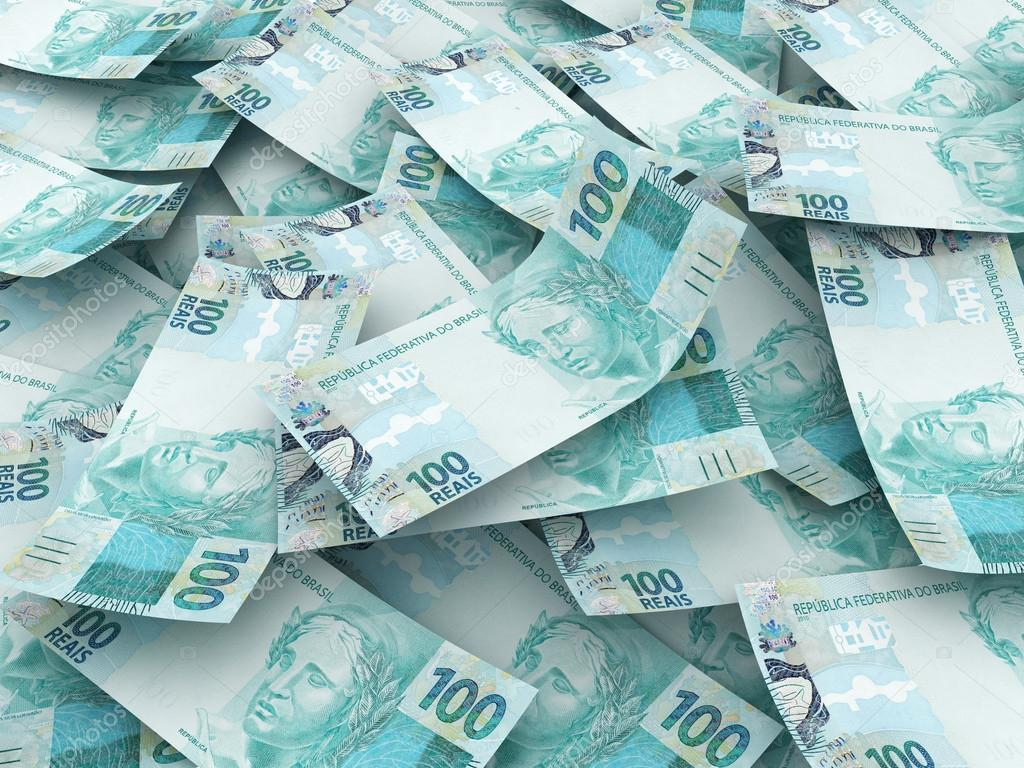

##Montando o gráfico com base na história definida

**Dificuldade com a Proposta Inicial**

A proposta original da plataforma Dataquest era analisar a variação do dólar, mas uma vez que sou brasileira, e não acompanho de perto a vida nos EUA seja política, econômica e etc, não tenho parâmetros o suficiente para elaborar um storytelling. Isso exigiria tempo de estudo dos fatores que podem ter influenciado essa variação ao longo dos anos.

**Definindo uma nova proposta**

Ainda assim a proposta original me inspirou, os exemplos de gráficos mostrando a crise financeira de 2008 e a comparação na variação entre os últimos 3 presidentes dos EUA, me fez pensar "e se eu olhar a variação do real?". Assim não precisaria de tanto tempo de estudo apenas para praticar um exercício que me permite flexibilidade na execução, pois o intuito é treinar minhas habilidades e fixar o conhecimento abstraído durante o curso.

**História a ser contada**

O gráfico gerado acima mostra como a variação do real está em constante subida desde 2018, isso reforça um sentimento/uma sensação que eu vivendo no Brasil venho acompanhando, porém agora com dados e se baseando em fatos.

No Brasil costumamos ficar mais atentos a variação do real em relação ao dólar, pois temos mais clareza da forma que nos impacta. 

O que viemos acompanhando ao longo dos anos é que com a entrada do Presidente Bolsonaro a situação econômica do Brasil vem piorando e as pessoas têm percebido isso ao comprar os itens para suprir as necessidades mais básicas. A inflação vem aumentando, a taxa Selic diminuindo, e a crise sanitária que atingiu o mundo piorou o que já não estava bom. 

E com isso acompanhamos o dólar subir de uma maneira nunca vista antes, e replicando essa ideia ao Euro conseguimos evidenciar o mesmo comportamento.

**De que forma será contada?**

Vou utilizar o mesmo gráfico acima, seguindo os seguintes tópicos:

* eliminar excesso de non-data ink (partes do gráfico não informativas)
* destacar período do processo de impeachment da Dilma Rousseff
* destacar o período da entrada do Presidente Bolsonaro no poder
* destacar início da pandemia de Covid-19


In [ ]:
euro_to_real = euro_to_real[euro_to_real['Time'] >= '2008-01-01']

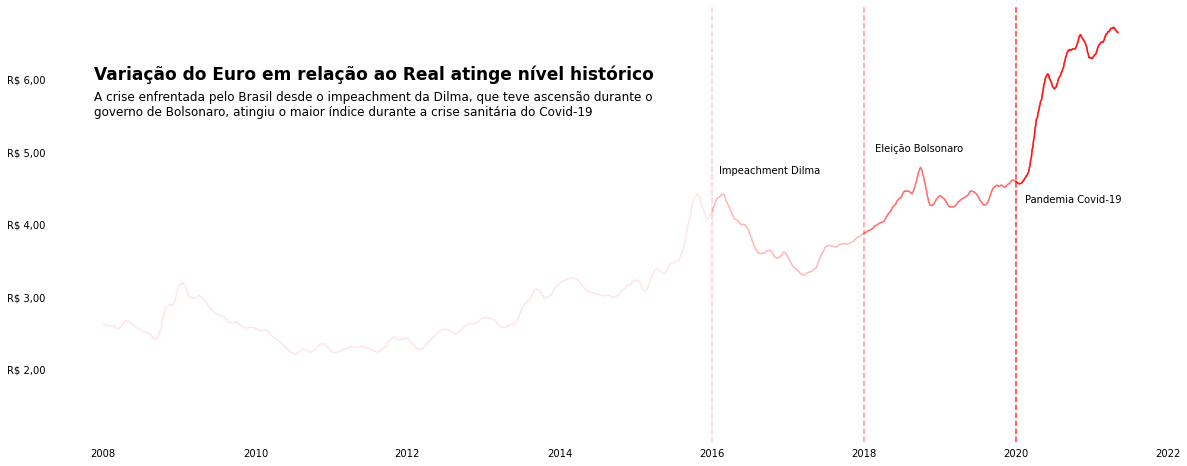

In [ ]:
#cria desenho e determina tamanho
fig, ax = plt.subplots(figsize=(20,8))

#remove o quadro que envolve o grafico
for location in ['right','left','top','bottom']:
  ax.spines[location].set_visible(False)

#remove traços que acompanha as labels
ax.tick_params(bottom=False, left=False)

#melhora leitura labels eixo y
plt.ylim(1,7)
ax.set_yticklabels(['','R$ 2,00','R$ 3,00','R$ 4,00','R$ 5,00','R$ 6,00',''])

#período completo
ax.plot(euro_to_real['Time'],
         euro_to_real['rolling_real'],
         color='red',
         alpha=0.1)

#período pós impeachment Dilma (2016)
dilma_period = euro_to_real[euro_to_real['Time'] >= '2016-01-01']

ax.plot(dilma_period['Time'],
         dilma_period['rolling_real'],
         color='red',
         alpha=0.2)
ax.axvline(x=min(dilma_period['Time']), linestyle='--', alpha=0.2, color='red')

#período pós eleição Bolsonaro (2018)
bolsonaro_period = euro_to_real[euro_to_real['Time'] >= '2018-01-01']
ax.plot(bolsonaro_period['Time'],
         bolsonaro_period['rolling_real'],
         color='red',
         alpha=0.4)
ax.axvline(x=min(bolsonaro_period['Time']), linestyle='--', alpha=0.4, color='red')


#período pós covid-19 (2020)
covid_period = euro_to_real[euro_to_real['Time'] >= '2020-01-01']
ax.plot(covid_period['Time'],
         covid_period['rolling_real'],
         color='red',
         alpha=0.8)
ax.axvline(x=min(covid_period['Time']), linestyle='--', alpha=0.8, color='red')

#encontrar coordenadas
#print(ax.get_xticks())
#print(ax.get_yticks())

#Titulo, subtitulo e textos
ax.text(733000, 6,'Variação do Euro em relação ao Real atinge nível histórico', size=17, weight='bold')
ax.text(733000, 5.7,'A crise enfrentada pelo Brasil desde o impeachment da Dilma, que teve ascensão durante o', size=12)
ax.text(733000, 5.5,'governo de Bolsonaro, atingiu o maior índice durante a crise sanitária do Covid-19', size=12)

ax.text(736000, 4.7,'Impeachment Dilma', size=10)
ax.text(736750, 5,'Eleição Bolsonaro', size=10)
ax.text(737470, 4.3,'Pandemia Covid-19', size=10)

plt.show()

#Considerações Finais

O objetivo desse notebook é principalmente desenvolver habilidades de Storytelling e Visualização de Dados Explanatórias, quando temos a intenção de comunicar uma informação a um público-alvo (e não gerar gráficos para explorar os dados). 

O tema proposto de analisar dados de variação do euro em relação à outras moedas, como dólar e real, é um tema que difilcilmente conseguimos explicar sem envolver fenômenos políticos. 

O objetivo aqui não é apoiar determinadas ideologias políticas, e sim apenas mostrar dados e como alguns fenômenos políticos podem ter influenciado nos resultados. Como se trata apenas de um exercício, não foi feito uma pesquisa profunda nem consultoria com especialistas em economia e áreas correlatas. Sendo assim não devemos assumir as informações aqui apresentadas como verdade absoluta.